<a href="https://colab.research.google.com/github/dikoharyadhanto/Machine-Learning-Documentation/blob/main/003-Pemodelan_ScikitLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scikit-learn adalah library untuk machine learning dalam melakukan prediksi atau mempelajari pola permasalahan dan berbagai fitur lainnya. diantaranya regresi (**regression**), klasifikasi (**classification**), pengelompokkan/penggugusan (**clustering**), **data preprocessing**, **dimensionality reduction**, dan **model selection** (pembandingan, validasi, dan pemilihan parameter maupun model).

# **Persiapan Dataset**

In [2]:
## EXPLORING DATA

import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
#Drop rows with missing value   
dataset_clean = dataset.dropna() 
print('Ukuran dataset_clean:', dataset_clean.shape) 

Ukuran dataset_clean: (12316, 18)


In [4]:
# Fill missing value with mean of feature value  
dataset.fillna(dataset.mean(), inplace = True)
# Checking missing value for each feature  
print(dataset.isnull().sum())
# Counting total missing value  
print(dataset.isnull().sum().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64
0


In [5]:
from sklearn.preprocessing import MinMaxScaler  
#Define MinMaxScaler as scaler  
scaler = MinMaxScaler()  
#list all the feature that need to be scaled  
scaling_column = [
                  'Administrative','Administrative_Duration','Informational',
                  'Informational_Duration','ProductRelated','ProductRelated_Duration',
                  'BounceRates','ExitRates','PageValues'
                 ]
#Apply fit_transfrom to scale selected feature  
dataset[scaling_column] = scaler.fit_transform(dataset[scaling_column])

In [6]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Convert feature/column 'Month'
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
print(LE.classes_)
print(np.sort(dataset['Month'].unique()))
print('')

# Convert feature/column 'VisitorType'
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
print(LE.classes_)
print(np.sort(dataset['VisitorType'].unique()))

['Aug' 'Dec' 'Feb' 'Jul' 'June' 'Mar' 'May' 'Nov' 'Oct' 'Sep']
[0 1 2 3 4 5 6 7 8 9]

['New_Visitor' 'Other' 'Returning_Visitor']
[0 1 2]


# **Features & Label**

Dalam dataset user online purchase, label target sudah diketahui, yaitu kolom Revenue yang bernilai 1 untuk user yang membeli dan 0 untuk yang tidak membeli, sehingga pemodelan yang dilakukan ini adalah klasifikasi.

Untuk melatih dataset menggunakan Scikit-Learn library, dataset perlu dipisahkan ke dalam Features dan Label/Target.

Variabel Feature akan terdiri dari variabel yang dideklarasikan sebagai X
`[Revenue]` adalah variabel Target yang dideklarasikan sebagai y.

Gunakan fungsi `drop()` untuk menghapus kolom `[Revenue]` dari dataset.

In [7]:
# removing the target column Revenue from dataset and assigning to X
X = dataset.drop(['Revenue'], axis = 1)
# assigning the target column Revenue to y
y = dataset['Revenue']
# checking the shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (12330, 17)
Shape of y: (12330,)


# **Training & Test Dataset**

Sebelum kita melatih model dengan suatu algorithm machine, dataset perlu kita bagi ke dalam training dataset dan test dataset dengan perbandingan 80:20. 80% digunakan untuk training dan 20% untuk proses testing.

Scikit-learn tidak dapat memproses dataframe dan hanya mengakomodasi format data tipe Array. Fungsi `train_test_split()` dari Scikit-Learn, otomatis mengubah dataset dari dataframe ke dalam format array.

Fungsi Training adalah melatih model untuk mengenali pola dalam data, sedangkan testing berfungsi untuk memastikan bahwa model yang telah dilatih tersebut mampu dengan baik memprediksi label dari new observation dan belum dipelajari oleh model sebelumnya.

In [8]:
from sklearn.model_selection import train_test_split
# splitting the X, and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# checking the shapes
print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (9864, 17)
Shape of y_train : (9864,)
Shape of X_test : (2466, 17)
Shape of y_test : (2466,)


# **Training Model: Fit**

Dengan Scikit-Learn, proses pelatihan model atau training menjadi sangat sederhana. Kita cukup memanggil nama algorithm yang akan kita gunakan, biasanya disebut classifier untuk problem klasifikasi, dan regressor untuk problem regresi.

Contohnya, kita akan menggunakan Decision Tree. Kita hanya perlu memanggil fungsi `DecisionTreeClassifier()` yang kita namakan “`model`”. Kemudian menggunakan fungsi `.fit()` dan `X_train`, `y_train` untuk melatih classifier tersebut dengan training dataset.


In [9]:
from sklearn.tree import DecisionTreeClassifier
# Call the classifier
model = DecisionTreeClassifier()
# Fit the classifier to the training data
model = model.fit(X_train, y_train)

# **Training Model: Predict**

Setelah model/classifier terbentuk, selanjutnya kita menggunakan model ini untuk memprediksi LABEL dari testing dataset (X_test), menggunakan fungsi .`predict()`. Fungsi ini akan mengembalikan hasil prediksi untuk setiap data point dari X_test dalam bentuk array. Proses ini kita kenal dengan TESTING.

In [10]:
# Apply the classifier/model to the test data
y_pred = model.predict(X_test)
print(y_pred.shape)

(2466,)


# **Evaluasi Model Performance**

Tahap terakhir dari modelling yaitu evaluasi hasil model. Untuk evaluasi model performance, setiap algorithm mempunyai metrik yang berbeda-beda. Metrik paling sederhana untuk mengecek performansi model adalah accuracy.

Kita bisa munculkan dengan fungsi `.score( )`. Tetapi, di banyak real problem, accuracy saja tidaklah cukup. Metode lain yang digunakan adalah dengan Confusion Matrix. Confusion Matrix merepresentasikan perbandingan prediksi dan real LABEL dari test dataset yang dihasilkan oleh algoritma ML.

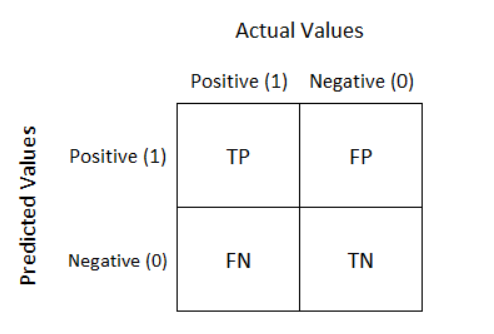

- True Positive (TP): Jika user diprediksi (Positif) membeli ([Revenue] = 1]), dan memang benar (True) membeli.
- True Negative (TN): Jika user diprediksi tidak (Negatif) membeli tetapi sebenarnya membeli (True).
- False Positive (FP): Jika user diprediksi Positif membeli (Positif), tetapi ternyata tidak membeli (False).
- False Negatif (FN): Jika user diprediksi tidak membeli (Negatif), dan aktualnya user tersebut memang tidak membeli (False).

Untuk menampilkan confusion matrix cukup menggunakan fungsi `confusion_matrix()` dari Scikit-Learn

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

# evaluating the model
print('Training Accuracy :', model.score(X_train, y_train))
print('Testing Accuracy :', model.score(X_test, y_test))

# confusion matrix
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 1.0
Testing Accuracy : 0.8584752635847527

Confusion matrix:
[[1883  161]
 [ 188  234]]


Berdasarkan confusion matrix, dapat mengukur metrik — metrik berikut :
- Accuracy = (TP + TN ) / (TP+FP+FN+TN)
- Precision = (TP) / (TP+FP)
- Recall = (TP) / (TP + FN)
- F1 Score = 2 * (Recall*Precission) / (Recall + Precission)

Tidak perlu menghitung nilai ini secara manual. Cukup gunakan fungsi `classification_report()` untuk memunculkan hasil perhitungan metrik-metrik tersebut.

In [12]:
# classification report
print('\nClassification report:')
cr = classification_report(y_test, y_pred)
print(cr)


Classification report:
              precision    recall  f1-score   support

       False       0.91      0.92      0.92      2044
        True       0.59      0.55      0.57       422

    accuracy                           0.86      2466
   macro avg       0.75      0.74      0.74      2466
weighted avg       0.86      0.86      0.86      2466



## **Pakai Metrik yang Mana?**

- Jika dataset memiliki jumlah data False Negatif dan False Positif yang seimbang (Symmetric), maka bisa gunakan Accuracy, tetapi jika tidak seimbang, maka sebaiknya menggunakan F1-Score.
- Dalam suatu problem, jika lebih memilih False Positif lebih baik terjadi daripada False Negatif, misalnya: Dalam kasus Fraud/Scam, kecenderungan model mendeteksi transaksi sebagai fraud walaupun kenyataannya bukan, dianggap lebih baik, daripada transaksi tersebut tidak terdeteksi sebagai fraud tetapi ternyata fraud. Untuk problem ini sebaiknya menggunakan Recall.
- Sebaliknya, jika lebih menginginkan terjadinya True Negatif dan sangat tidak menginginkan terjadinya False Positif, sebaiknya menggunakan Precision. Contohnya adalah pada kasus klasifikasi email SPAM atau tidak. Banyak orang lebih memilih jika email yang sebenarnya SPAM namun diprediksi tidak SPAM (sehingga tetap ada pada kotak masuk email kita), daripada email yang sebenarnya bukan SPAM tapi diprediksi SPAM (sehingga tidak ada pada kotak masuk email).